In [52]:
# Select start and end date
start_date = '2023-07-14 10:22:00'
end_date = '2023-07-14 11:01:00'

# # big round test
start_date = '2023-07-14 10:22:00'
end_date = '2023-07-14 10:27:00'
# start_date = '2023-07-14 10:23:30'
# end_date = '2023-07-14 10:26:00'

# # going up test
# start_date = '2023-07-14 10:28:00'
# end_date = '2023-07-14 10:35:00'
# start_date = '2023-07-14 10:30:00'
# end_date = '2023-07-14 10:33:00'

# # big 8 test
# start_date = '2023-07-14 10:39:00'
# end_date = '2023-07-14 10:44:00'
# start_date = '2023-07-14 10:39:30'
# end_date = '2023-07-14 10:43:00'

# # small round test
# start_date = '2023-07-14 10:49:00'
# end_date = '2023-07-14 10:56:00'
start_date = '2023-07-14 10:52:30'
end_date = '2023-07-14 10:55:30'

# small 8 test
start_date = '2023-07-14 10:56:00'
end_date = '2023-07-14 11:01:00'
start_date = '2023-07-14 10:57:00'
end_date = '2023-07-14 11:00:00'

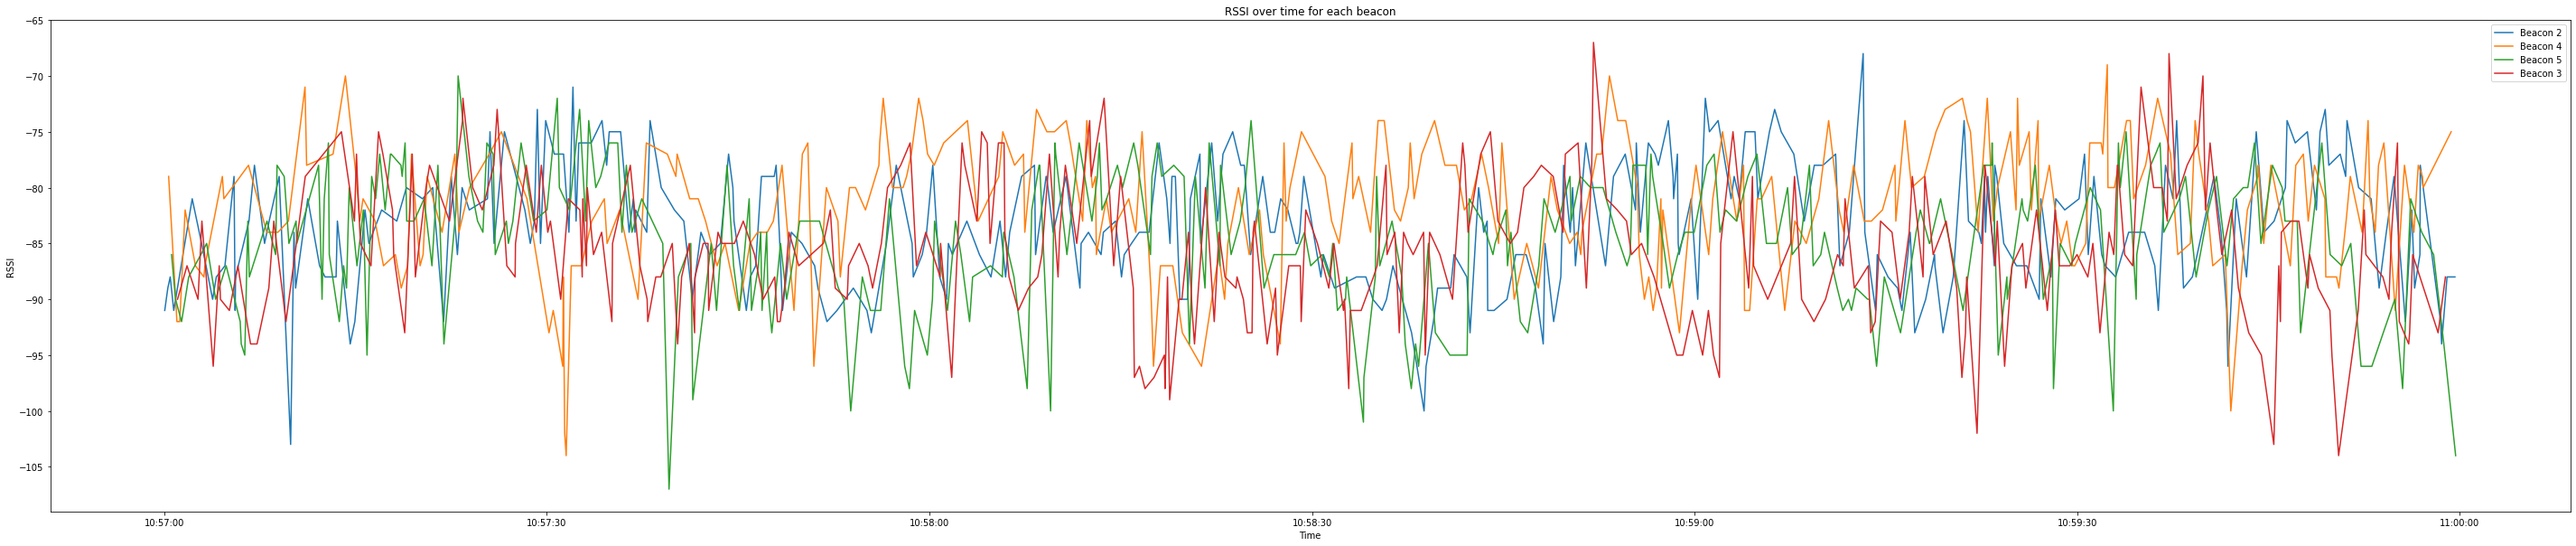

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('data_0714/lora_module_received_1689321731873899299.csv', skipinitialspace=True)

# Filter the DataFrame
data = data[data['packet_text'].isin(['2', '3', '4', '5'])]

# Convert the received_time to datetime format
data['received_time'] = pd.to_datetime(data['received_time'], unit='ns')

# Localize the timestamp to GMT first (assuming the original time is in GMT)
data['received_time'] = data['received_time'].dt.tz_localize('GMT')

# Convert to Rome time
data['received_time'] = data['received_time'].dt.tz_convert('Europe/Rome')

# Filter data based on the date range
mask = (data['received_time'] > start_date) & (data['received_time'] <= end_date)
data = data.loc[mask]

plt.figure(figsize=(50,10),facecolor="white")

# Plot the RSSI for each beacon over time
for beacon in data['packet_text'].unique():
    beacon_data = data[data['packet_text'] == beacon]
    plt.plot(beacon_data['received_time'], beacon_data['rssi'], label=f'Beacon {beacon}')


plt.xlabel('Time')
plt.ylabel('RSSI')
plt.title('RSSI over time for each beacon')
plt.legend()
plt.show()


In [35]:
data

,received_time,packet_text,rssi
11225,2023-07-14 10:39:30.189947392+02:00,3,-89.0
11226,2023-07-14 10:39:30.500627200+02:00,4,-85.0
11227,2023-07-14 10:39:30.539739648+02:00,4,-86.0
11228,2023-07-14 10:39:30.654924544+02:00,2,-87.0
11229,2023-07-14 10:39:30.985124608+02:00,4,-90.0
...,...,...,...
12634,2023-07-14 10:42:59.194264576+02:00,2,-103.0
12635,2023-07-14 10:42:59.283242240+02:00,4,-100.0
12636,2023-07-14 10:42:59.376274944+02:00,3,-98.0
12637,2023-07-14 10:42:59.670840320+02:00,5,-97.0
